In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt

2. Load the dataset Into the tool

In [9]:
df = pd.read_csv('Mall_Customers.csv')

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

3. Perform Below visualizations:


Univariate Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


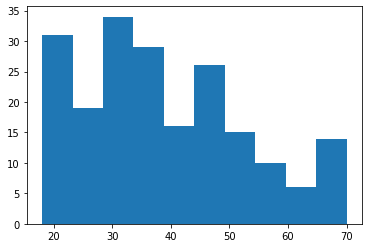

In [13]:
plt.hist(df['Age'])
plt.show()

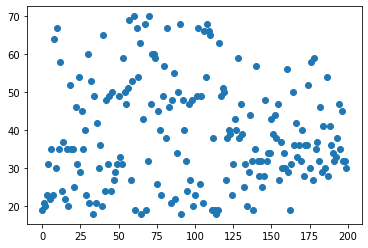

In [14]:
plt.scatter(df.index, df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


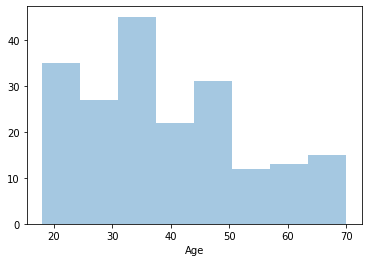

In [15]:
sns.distplot(df['Age'],kde=False)

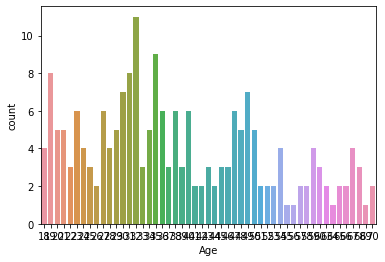

In [16]:
sns.countplot(x='Age',data=df)

Bivariate Analysis

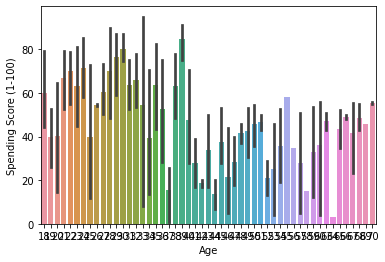

In [23]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

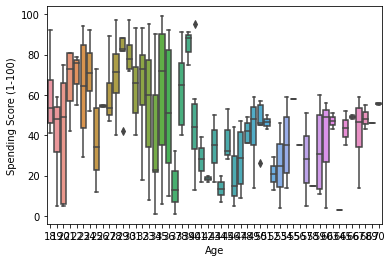

In [24]:
sns.boxplot(data=df, x='Age',y='Spending Score (1-100)')

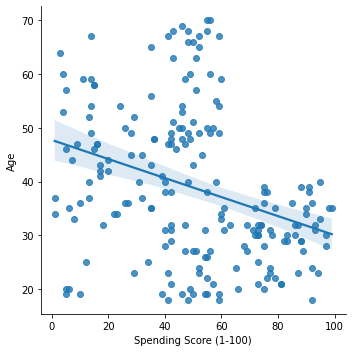

In [20]:
sns.lmplot(y='Age',x='Spending Score (1-100)',data=df)

In [25]:
#Chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df['Spending Score (1-100)'])
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Estimated coefficients:
b_0 = 73.70119104335399 \nb_1 = -0.6049212623771938


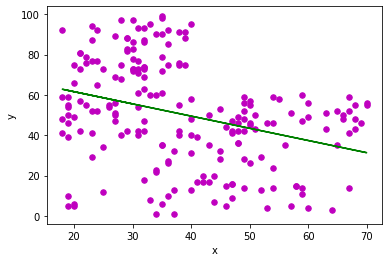

In [27]:
def estimate_coef(x, y):
  n = np.size(x)
  m_x = np.mean(x)
  m_y = np.mean(y)
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
  return (b_0, b_1)
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",marker = "o", s = 30)
  # predicted response vector
  y_pred = b[0] + b[1]*x
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
def main():
  x = df['Age']
  y = df['Spending Score (1-100)']
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \\nb_1 = {}".format(b[0], b[1]))
  plot_regression_line(x, y, b)
if __name__ == "__main__":
  main()

Multivariate Analysis

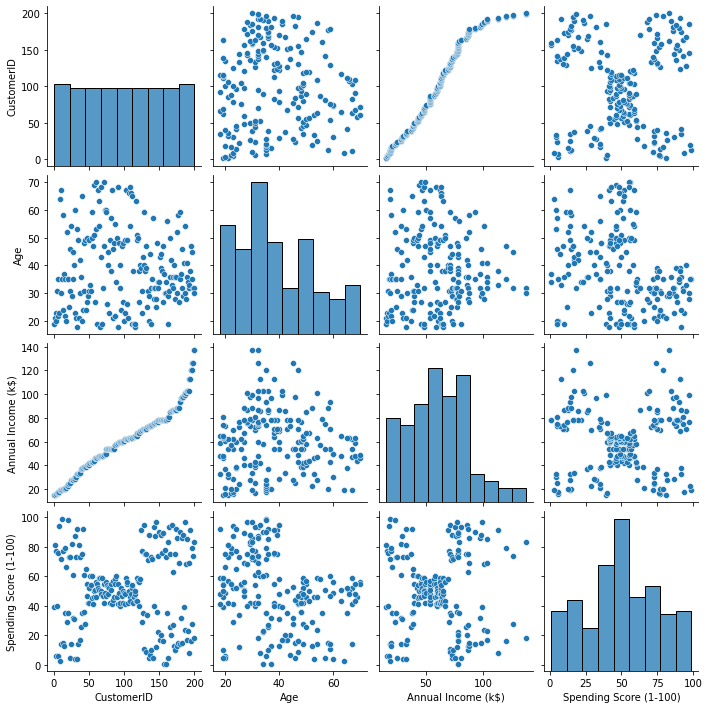

In [28]:
sns.pairplot(df)

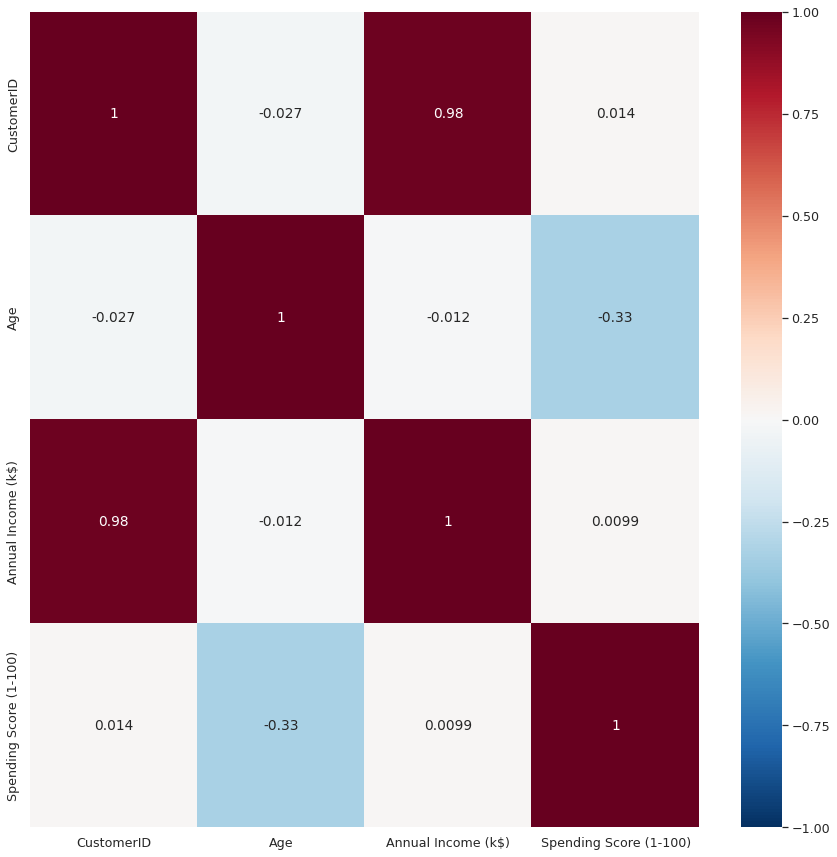

In [29]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1);

4. Descriptive Analysis

In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [32]:
df['Age'].sum()

7770

In [33]:
df['Age'].cumsum()

0        19
1        40
2        60
3        83
4       114
       ... 
195    7631
196    7676
197    7708
198    7740
199    7770
Name: Age, Length: 200, dtype: int64

In [34]:
df['Age'].min()

18

In [35]:
df['Age'].max()

70

In [36]:
df['Age'].abs()

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [37]:
df['Age'].prod()

0

In [38]:
df['Age'].cumprod()

0           19
1          399
2         7980
3       183540
4      5689740
        ...   
195          0
196          0
197          0
198          0
199          0
Name: Age, Length: 200, dtype: int64

In [39]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [40]:
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

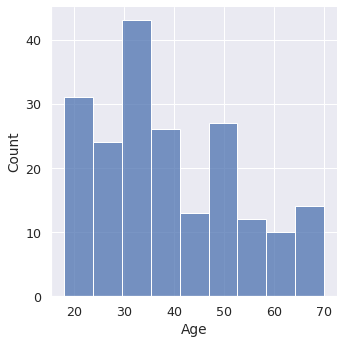

In [41]:
print(sns.displot(df['Age']))

5. Check for missing data and handle it

In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values

6. Find the outliers and replace them outliers

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [44]:
quantile = df.quantile(q = [0.75,0.25])
quantile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [45]:
Upper_extreme = quantile.iloc[0] + (1.5*IQR)
Upper_extreme

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [46]:
lower_extreme = quantile.iloc[1] - (1.5*IQR)
lower_extreme

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

8. Split the data into dependent and independent variables.

In [50]:
x = df.iloc[:, [3, 4]].values
x.shape

(200, 2)

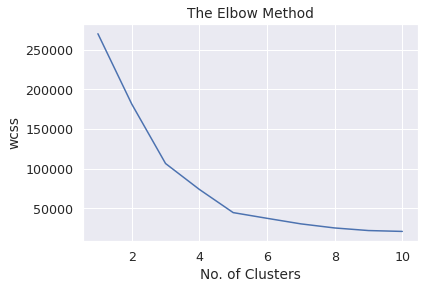

In [51]:
from sklearn.cluster import KMeans
#K-Means Clustering
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

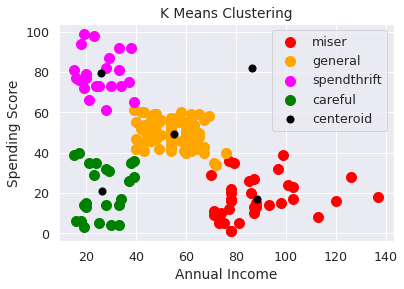

In [53]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'general')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'green', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [55]:
#Based on Age
x = df.iloc[:, [2, 4]].values
x.shape

(200, 2)

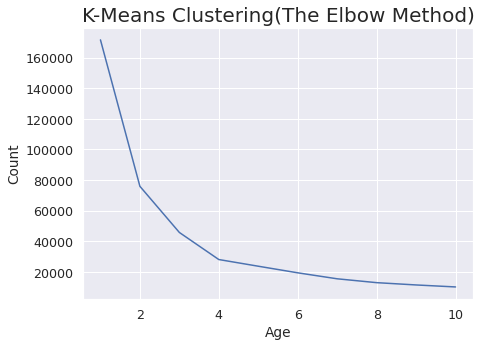

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

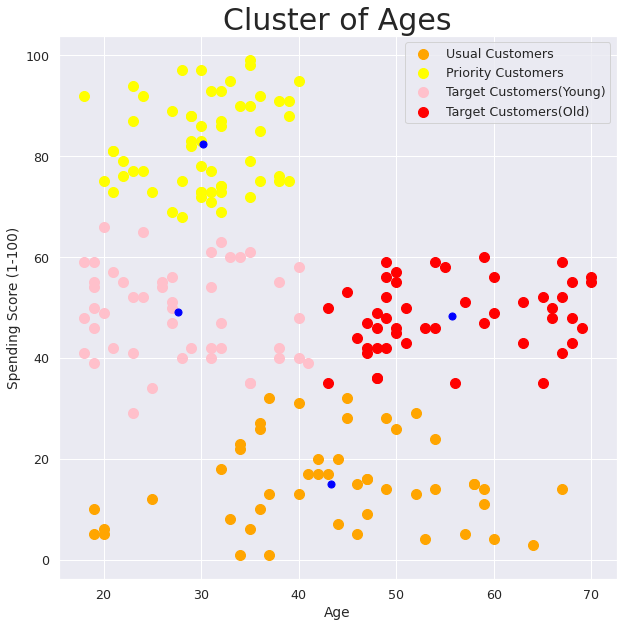

In [57]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'orange', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'yellow', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'pink', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [59]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [61]:
x = df.iloc[:, [1, 4]].values
x.shape

(200, 2)

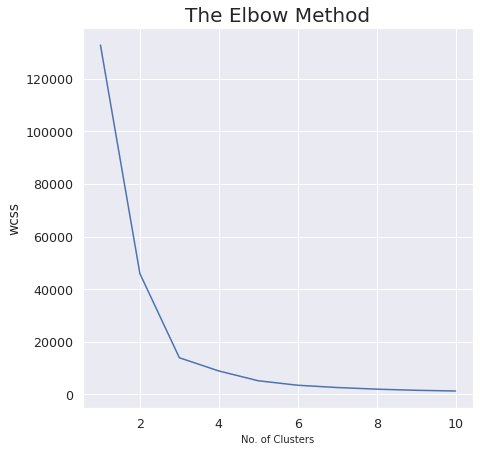

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

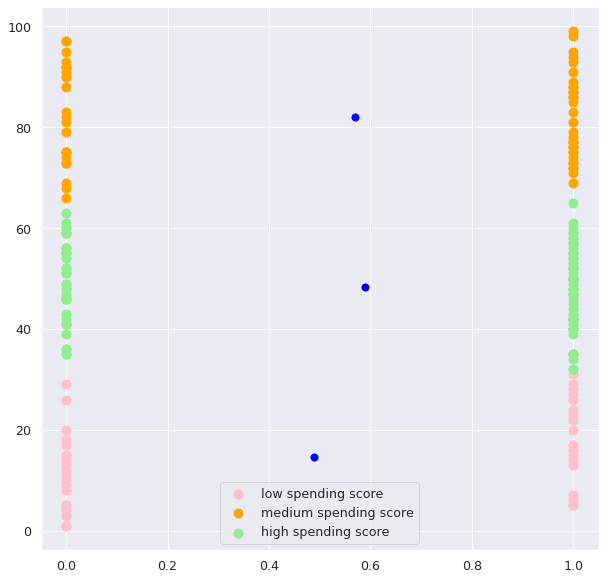

In [63]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict_train = model.predict(X_train)

In [ ]:
print('Training accuracy - Random Forest: ',accuracy_score(y_train,y_predict_train))

Training accuracy - Random Forest:  0.983366935483871


Categorical Coumns and Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() 
df['CustomerID'] = encoder.fit_transform(df['CustomerID'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,19,15,39
1,1,0,21,15,81
2,2,1,20,16,6
3,3,1,23,16,77
4,4,1,31,17,40
